In [1]:
import tensorflow as tf
print("Tensorflow version is:", tf.__version__)

from tensorflow import keras

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.layers import LSTM, Dropout, Dense

import seaborn as sns   # plotting heatmap
from sklearn.model_selection import train_test_split


Tensorflow version is: 2.14.0


Load the train and test dataset with y(label) data.

In [2]:

y_train_df = pd.read_csv('/Users/jingming/DataSets/COVAREP/y_Train.tsv',sep='\t',header=None)
y_train = y_train_df.iloc[:,1]

y_test_df = pd.read_csv('/Users/jingming/DataSets/COVAREP/y_Test.tsv',sep='\t',header=None)
y_test = y_test_df.iloc[:,1]

names=['F0','VUV','NAQ','QOQ','H1H2','PSP','MDQ','peakSlope','Rd', 
    'Rd_conf','creak','MCEP_0','MCEP_1','MCEP_2','MCEP_3','MCEP_4','MCEP_5', 
    'MCEP_6','MCEP_7','MCEP_8','MCEP_9','MCEP_10','MCEP_11','MCEP_12', 
    'MCEP_13','MCEP_14','MCEP_15','MCEP_16','MCEP_17','MCEP_18', 
    'MCEP_19','MCEP_20','MCEP_21','MCEP_22','MCEP_23','MCEP_24',
    'HMPDM_0','HMPDM_1','HMPDM_2','HMPDM_3','HMPDM_4','HMPDM_5', 
    'HMPDM_6','HMPDM_7','HMPDM_8','HMPDM_9','HMPDM_10','HMPDM_11','HMPDM_12', 
    'HMPDM_13','HMPDM_14','HMPDM_15','HMPDM_16','HMPDM_17','HMPDM_18', 
    'HMPDM_19','HMPDM_20','HMPDM_21','HMPDM_22','HMPDM_23','HMPDM_24',
    'HMPDD_0','HMPDD_1','HMPDD_2','HMPDD_3','HMPDD_4','HMPDD_5', 
    'HMPDD_6','HMPDD_7','HMPDD_8','HMPDD_9','HMPDD_10','HMPDD_11','HMPDD_12'];


Load the train and test dataset with the X(features) data.

In [3]:
X_train_df = []
X_test_df = []
for i in y_train_df.index:
    id = y_train_df[0][i]
    df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    X_train_df.append(df)
    
for i in y_test_df.index:
    id = y_test_df[0][i]
    df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    X_test_df.append(df)

In [14]:
print(np.min([df[df[1]==1].shape[0] for df in X_train_df]))

print(np.min([df[df[1]==1].shape[0] for df in X_test_df]))

print(np.max([df[df[1]==1].shape[0] for df in X_train_df]))

print(np.max([df[df[1]==1].shape[0] for df in X_test_df]))

10800
13945
90993
92463


In [9]:
window_size = 10000

X_train = []
y_train = []

for i in y_train_df.index:
    id = y_train_df[0][i]
    df = X_train_df[i]
    df = df[df[1]==1]
    df = df.drop([ 1],axis=1)
    n = df.to_numpy().shape[0]
    if int(n/window_size) == 0:
        print(i)
    # for j in range(0,int(n/window_size)):
    #     # df = np.transpose(df.to_numpy())
    #     # X_train.append(np.transpose(df[j*window_size:(j+1)*window_size].to_numpy()))
    #     X_train.append(df[j*window_size:(j+1)*window_size].to_numpy())
    #     y_train.append(y_train_df[1][i])

    pad = int((n-window_size)/2)
    X_train.append(df[pad:(pad+window_size)].to_numpy())
    y_train.append(y_train_df[1][i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
        
X_test = []
y_test = []

for i in y_test_df.index:
    id = y_test_df[0][i]
    # df = pd.read_csv((f'/Users/jingming/DataSets/COVAREP/{id}_COVAREP.csv'),sep=',',header=None)
    df = X_test_df[i]
    df = df[df[1]==1]
    df = df.drop([ 1],axis=1)
    n = df.to_numpy().shape[0]
    # for j in range(0,int(n/window_size)):
    #     # df = np.transpose(df.to_numpy())
    #     # X_test.append(np.transpose(df[j*window_size:(j+1)*window_size].to_numpy()))
    #     X_test.append(df[j*window_size:(j+1)*window_size].to_numpy())
    #     y_test.append(y_test_df[1][i])

    pad = int((n-window_size)/2)
    X_test.append(df[pad:(pad+window_size)].to_numpy())
    y_test.append(y_test_df[1][i])
    
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [10]:
X = np.concatenate((X_train , X_test))
y = np.concatenate((y_train , y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

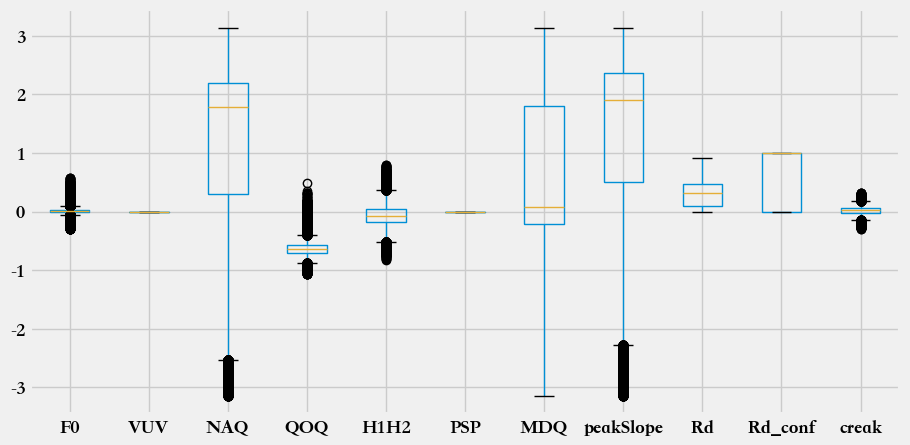

In [61]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = X_train_df[0]
# df.describe()
df.columns = names
df.boxplot(column=['F0','VUV','NAQ','QOQ','H1H2','PSP','MDQ','peakSlope','Rd', 
    'Rd_conf','creak'],figsize=[10,5])

plt.show()

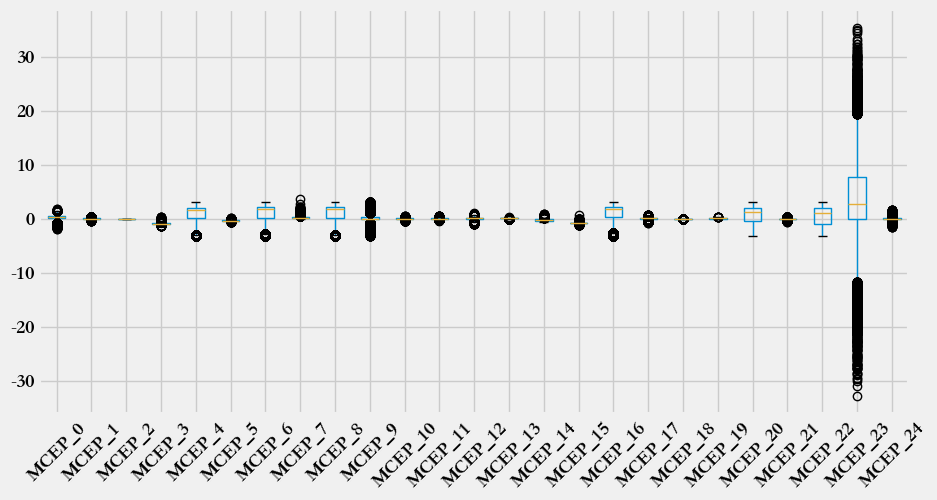

In [65]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = X_train_df[0]
# df.describe()
df.columns = names
df.boxplot(column=['MCEP_0','MCEP_1','MCEP_2','MCEP_3','MCEP_4','MCEP_5', 
    'MCEP_6','MCEP_7','MCEP_8','MCEP_9','MCEP_10','MCEP_11','MCEP_12', 
    'MCEP_13','MCEP_14','MCEP_15','MCEP_16','MCEP_17','MCEP_18', 
    'MCEP_19','MCEP_20','MCEP_21','MCEP_22','MCEP_23','MCEP_24'],rot=45,figsize=[10,5])

plt.show()

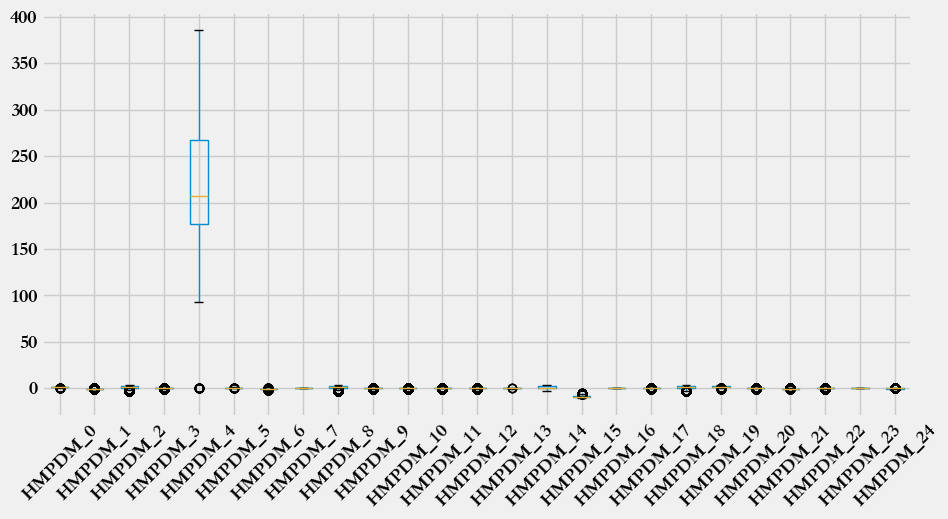

In [66]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = X_train_df[0]
# df.describe()
df.columns = names
df.boxplot(column=['HMPDM_0','HMPDM_1','HMPDM_2','HMPDM_3','HMPDM_4','HMPDM_5', 
    'HMPDM_6','HMPDM_7','HMPDM_8','HMPDM_9','HMPDM_10','HMPDM_11','HMPDM_12', 
    'HMPDM_13','HMPDM_14','HMPDM_15','HMPDM_16','HMPDM_17','HMPDM_18', 
    'HMPDM_19','HMPDM_20','HMPDM_21','HMPDM_22','HMPDM_23','HMPDM_24'],rot=45,figsize=[10,5])

plt.show()

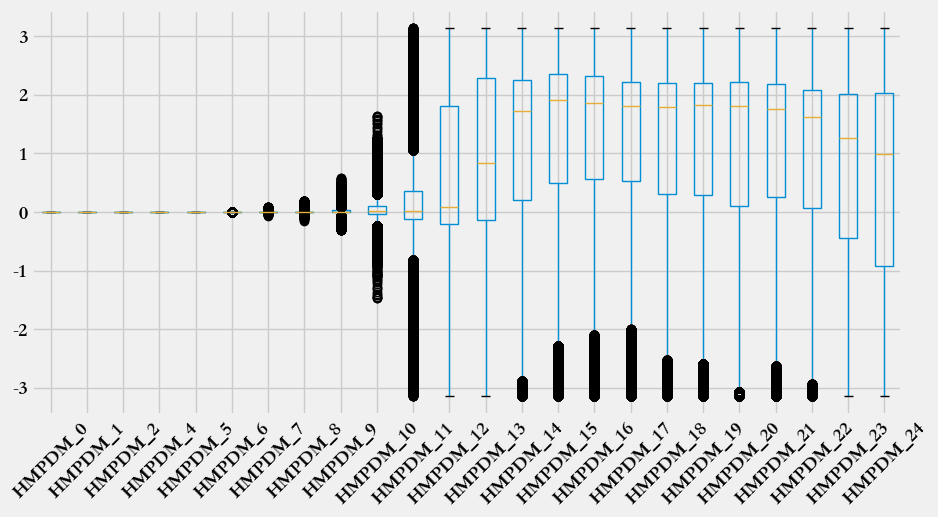

In [4]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = X_train_df[0]
# df.describe()
df.columns = names
df.boxplot(column=['HMPDM_0','HMPDM_1','HMPDM_2','HMPDM_4','HMPDM_5', 
    'HMPDM_6','HMPDM_7','HMPDM_8','HMPDM_9','HMPDM_10','HMPDM_11','HMPDM_12', 
    'HMPDM_13','HMPDM_14','HMPDM_15','HMPDM_16','HMPDM_17','HMPDM_18', 
    'HMPDM_19','HMPDM_20','HMPDM_21','HMPDM_22','HMPDM_23','HMPDM_24'],rot=45,figsize=[10,5])

plt.show()

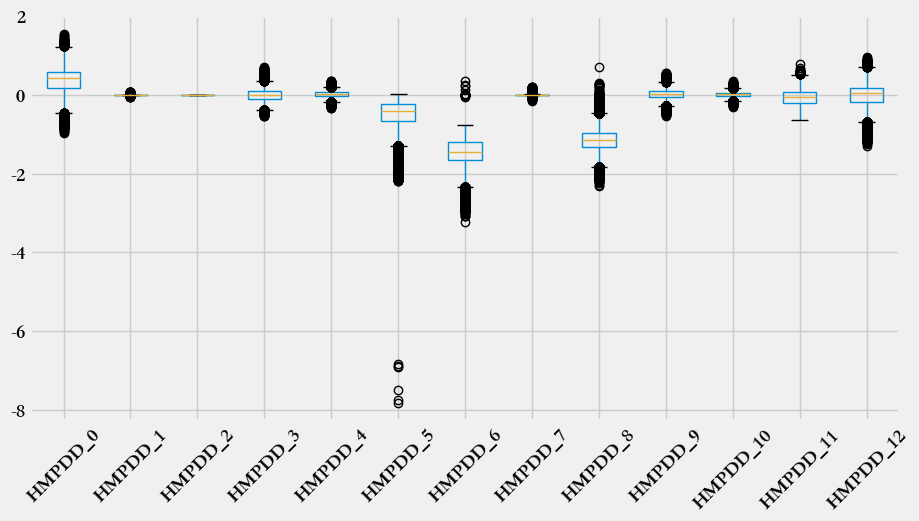

In [67]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = X_train_df[0]
# df.describe()
df.columns = names
df.boxplot(column=['HMPDD_0','HMPDD_1','HMPDD_2','HMPDD_3','HMPDD_4','HMPDD_5', 
    'HMPDD_6','HMPDD_7','HMPDD_8','HMPDD_9','HMPDD_10','HMPDD_11','HMPDD_12'],rot=45,figsize=[10,5])

plt.show()

In [51]:
import importlib
importlib.reload(matplotlib)

<module 'matplotlib' from '/Users/jingming/miniforge3/envs/voice-biomarker-py311/lib/python3.11/site-packages/matplotlib/__init__.py'>

In [4]:
# Print matplotlib font list

import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
Courier New
Courier New
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
Dej

In [9]:
df = pd.DataFrame({"F0 of #319":X_train_df[10][0],"F0 of #303":X_train_df[0][0]})


,F0 of #319,F0 of #303
count,67971.000000,98529.000000
mean,132.715239,222.956698
std,43.757052,60.735635
min,0.000000,0.000000
25%,96.500000,177.500000
50%,127.500000,207.500000
75%,166.500000,267.500000
max,240.000000,386.000000


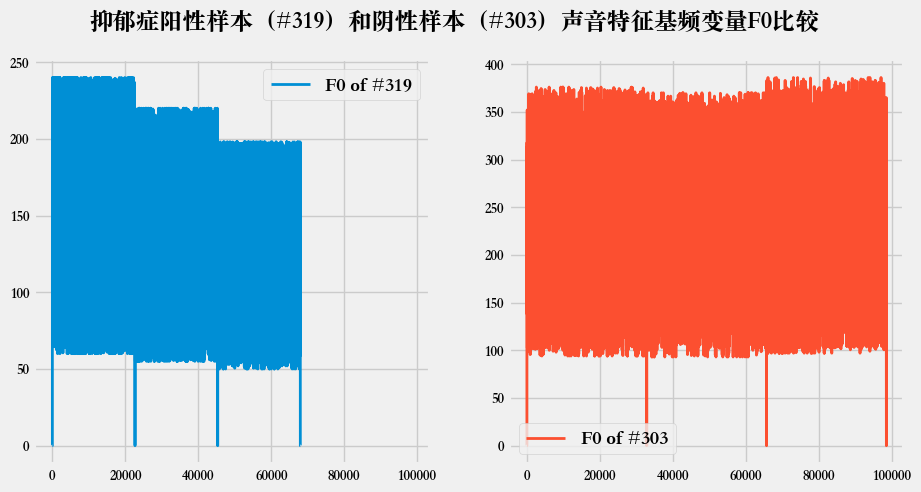

In [16]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"F0 of #319":X_train_df[10][0],"F0 of #303":X_train_df[0][0]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征基频变量F0比较')
plt.show()

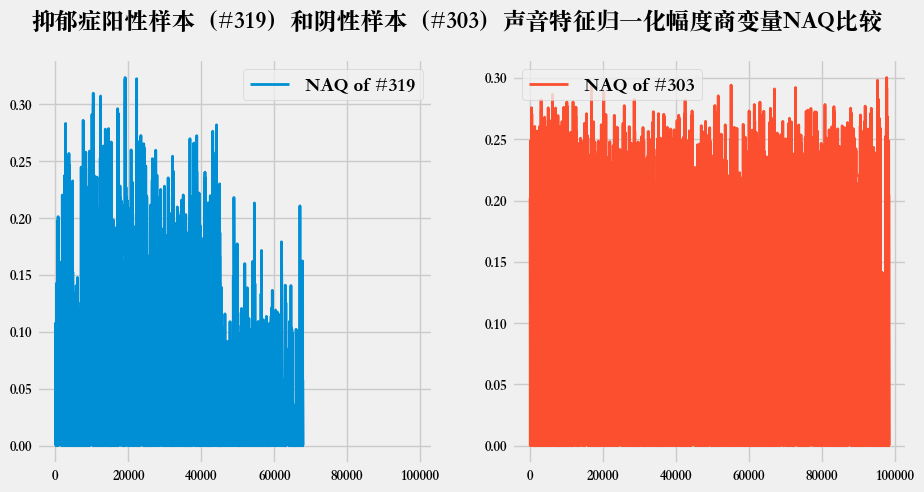

In [19]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"NAQ of #319":X_train_df[10][2],"NAQ of #303":X_train_df[0][2]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征归一化幅度商变量NAQ比较')
plt.show()

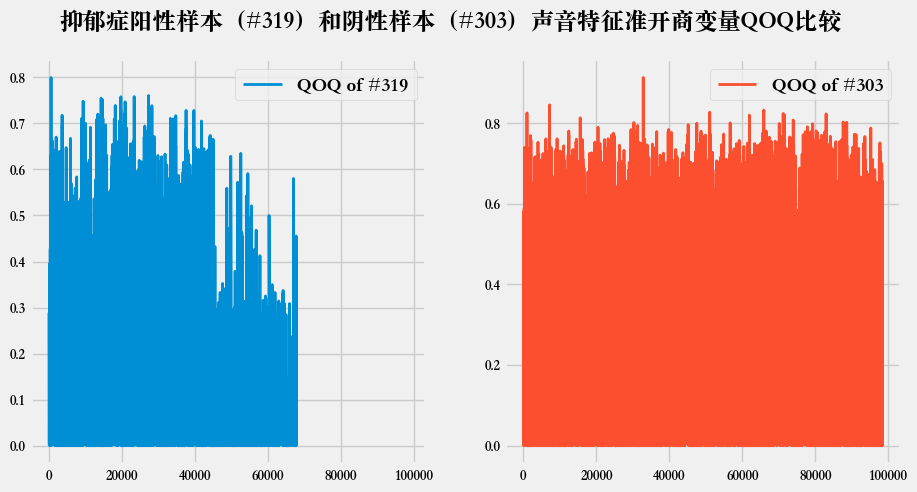

In [20]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"QOQ of #319":X_train_df[10][3],"QOQ of #303":X_train_df[0][3]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征准开商变量QOQ比较')
plt.show()

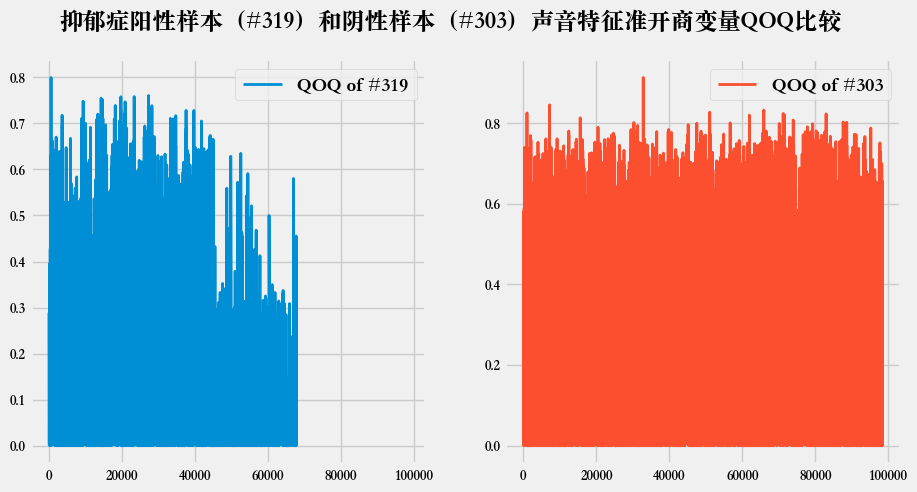

In [20]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"QOQ of #319":X_train_df[10][3],"QOQ of #303":X_train_df[0][3]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征准开商变量QOQ比较')
plt.show()

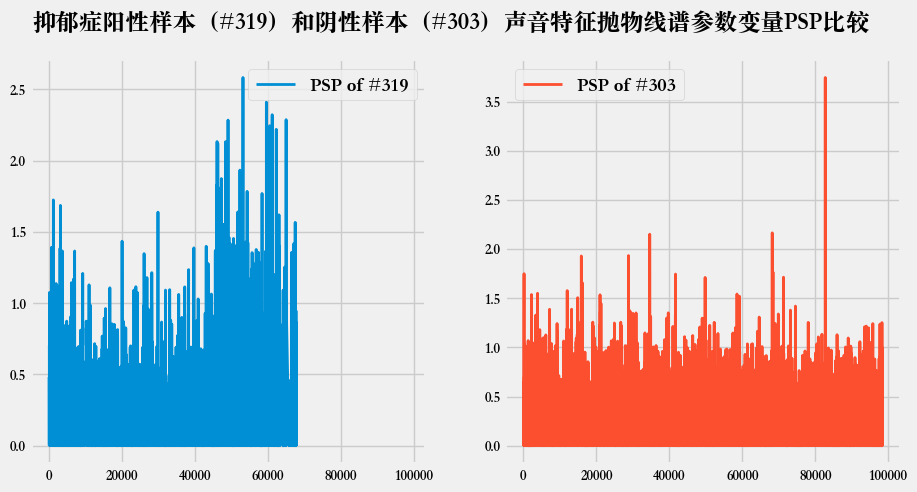

In [22]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"PSP of #319":X_train_df[10][5],"PSP of #303":X_train_df[0][5]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征抛物线谱参数变量PSP比较')
plt.show()

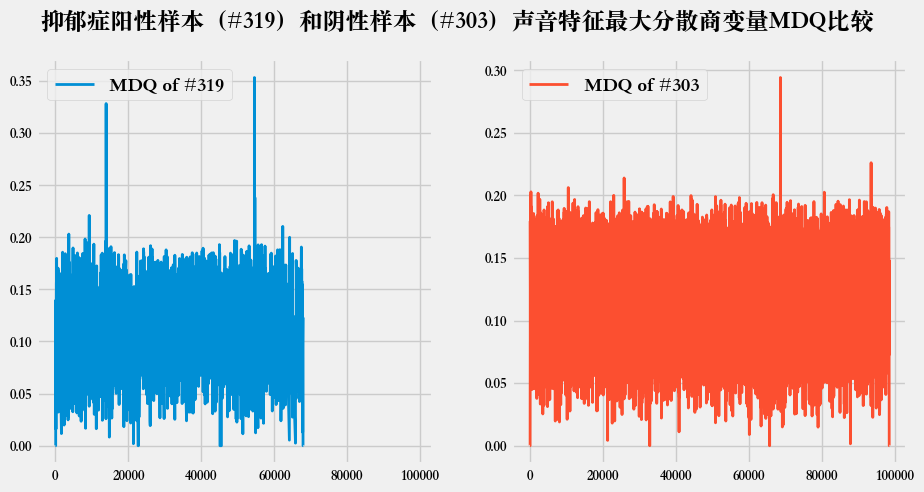

In [24]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"MDQ of #319":X_train_df[10][6],"MDQ of #303":X_train_df[0][6]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征最大分散商变量MDQ比较')
plt.show()

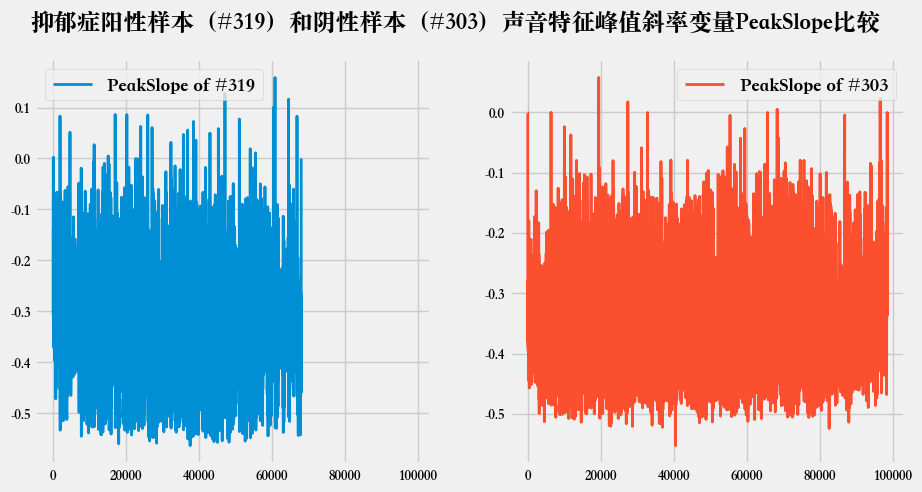

In [56]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"PeakSlope of #319":X_train_df[10][7],"PeakSlope of #303":X_train_df[0][7]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征峰值斜率变量PeakSlope比较')
plt.show()

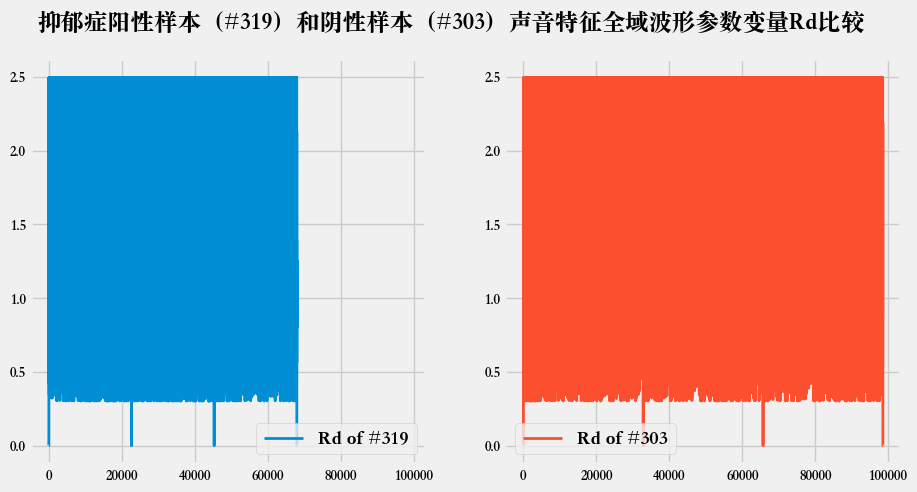

In [26]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"Rd of #319":X_train_df[10][8],"Rd of #303":X_train_df[0][8]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征全域波形参数变量Rd比较')
plt.show()

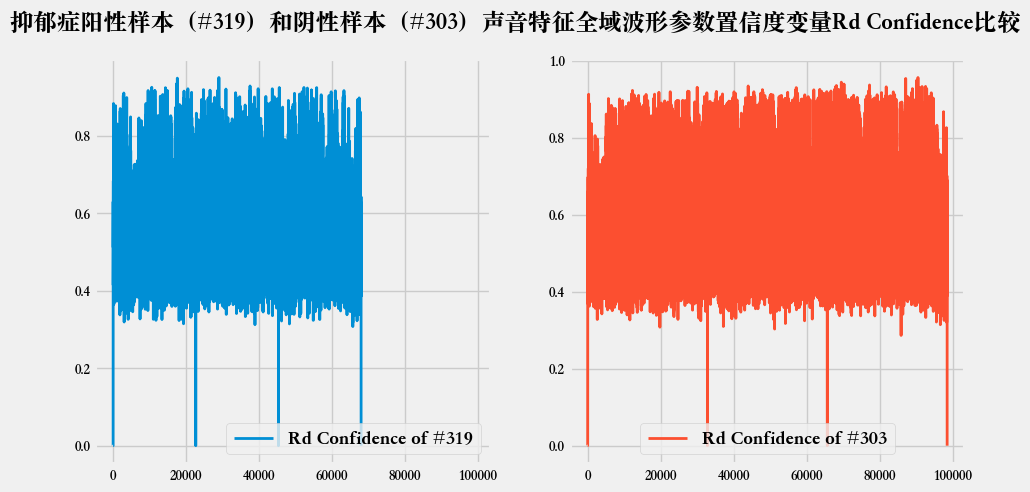

In [27]:
# Plot the time series
plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"Rd Confidence of #319":X_train_df[10][9],"Rd Confidence of #303":X_train_df[0][9]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征全域波形参数置信度变量Rd Confidence比较')
plt.show()

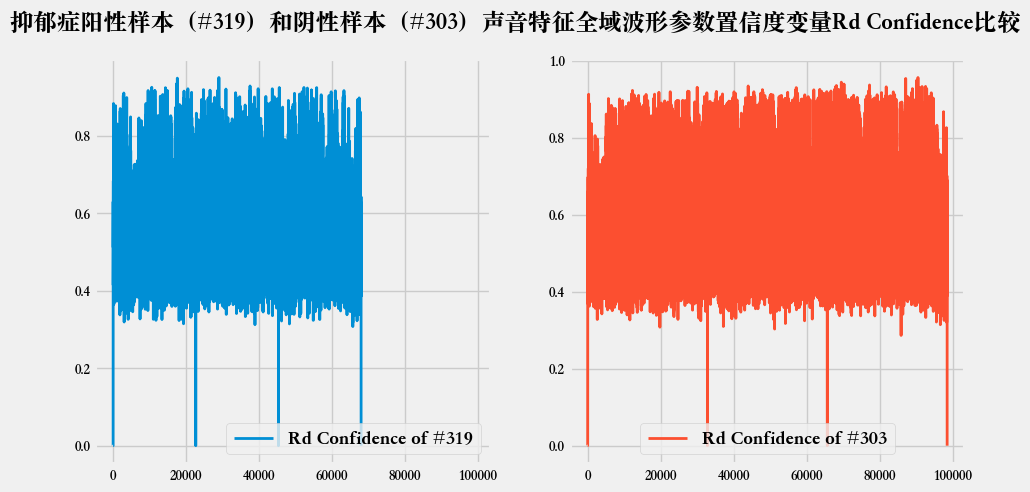

In [27]:
# Plot the time series
# plt.rcParams['font.sans-serif']=['Songti SC']  #解决中文显示乱码问题
# plt.rcParams['axes.unicode_minus']=False  #解决坐标轴负数的负号显示问题
plt.style.use('fivethirtyeight')
df = pd.DataFrame({"Rd Confidence of #319":X_train_df[10][9],"Rd Confidence of #303":X_train_df[0][9]})
df.plot(subplots=True,
        layout=(1, 2),
        figsize=(10,5),
        fontsize=10,
        linewidth=2,
        sharex=True,
        title='抑郁症阳性样本（#319）和阴性样本（#303）声音特征全域波形参数置信度变量Rd Confidence比较')
plt.show()

In [ ]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
print(f'window_size == {window_size}')

model = keras.Sequential()
# input_shape = (73, window_size)
model.add(LSTM(50,input_shape=(window_size,73)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[tf.keras.metrics.binary_accuracy]
              , optimizer="adam")

model.summary()

model.fit(X_train, y_train, batch_size=64, epochs=50)

test_loss, test_acc = model.evaluate(X_test, y_test)

window_size == 10000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                24800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 24851 (97.07 KB)
Trainable params: 24851 (97.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 6s 2s/step - loss: 0.9883 - binary_accuracy: 0.2609
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 0.8776 - binary_accuracy: 0.2609
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 0.8381 - binary_accuracy: 0.2522
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 0.7930 - binary_accu

In [55]:
model.save('model_.keras')

In [ ]:
# Plot the time series 
plt.style.use('fivethirtyeight')
df = X_train_df[0][0]
df.plot(subplots=True,
        layout=(1, 1),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=True,
        title='')
plt.show()